# Trabalho de Análise de Dados com python

Neste projeto, faremos uma análise do aproveitamento dos times do brasileirão para vermos se os times possuem um aproveitamento maior quando estão como mandantes ou não.
Iniciamos o projeto cuidando da base dos dados.

In [6]:
import basedosdados as bd

# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='mundo_transfermarkt_competicoes',
table_id='brasileirao_serie_a',
billing_project_id="campfutebol")

Downloading: 100%|██████████| 7968/7968 [00:03<00:00, 2107.24rows/s]


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

df

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2006,2006-07-12,11,Estádio Governador Magalhães Pinto,None,<NA>,<NA>,Fluminense,Flamengo,None,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2006,2006-07-12,11,Estádio Orlando Scarpelli,None,<NA>,<NA>,Flamengo,Atlético-PR,None,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,2006,2006-07-12,11,Estádio Municipal Anacleto Campanella,None,<NA>,<NA>,Corinthians,Santa Cruz,None,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,2006,2006-07-13,11,Allianz Parque,None,<NA>,<NA>,Grêmio,Santos FC,None,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,2006,2006-07-13,11,Estádio José do Rego Maciel,None,<NA>,<NA>,São Paulo,Fluminense,None,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,2008,2008-08-23,22,Estádio Orlando Scarpelli,Alício Pena Junior,4301,<NA>,Figueirense FC,EC Vitória,Paulo César Gusmão,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7964,2008,2008-09-03,24,Estádio Orlando Scarpelli,Luiz Flávio de Oliveira,15372,<NA>,Figueirense FC,Flamengo,Paulo César Gusmão,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7965,2008,2008-09-21,26,Estádio Orlando Scarpelli,Marcelo de Lima Henrique,0,<NA>,Figueirense FC,Cruzeiro,Paulo César Gusmão,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7966,2008,2008-11-20,36,Estádio Orlando Scarpelli,Wallace Nascimento Valente,0,<NA>,Figueirense FC,Náutico,Mário Sérgio,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Filtraremos os dados a partir de 2021, não queremos dados anteriores.

In [28]:
df_filtered = df[df['ano_campeonato']>2020].reset_index()
df_filtered

,index,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,3610,2021,2021-06-06,2,Estádio Urbano Caldeira,Jean Pierre Goncalves Lima,0,20120,Santos,Ceará SC,...,17,16,2,2,1,3,15,6,6,1
1,3611,2021,2021-06-13,3,Estádio Urbano Caldeira,Alexandre Vargas Tavares,0,20120,Santos,Juventude,...,17,14,0,2,0,3,18,2,9,1
2,3612,2021,2021-06-20,5,Estádio Urbano Caldeira,Savio Pereira Sampaio,0,20120,Santos,São Paulo,...,20,21,1,3,3,2,11,8,5,5
3,3613,2021,2021-06-28,7,Estádio Urbano Caldeira,Bruno Arleu de Araújo,0,20120,Santos,Atlético-MG,...,15,20,3,4,1,4,11,11,3,6
4,3614,2021,2021-07-01,8,Estádio Urbano Caldeira,Douglas Schwengber,0,20120,Santos,Sport Recife,...,18,11,2,1,1,3,14,8,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,5683,2023,2023-04-29,3,Allianz Parque,Wilton Sampaio,41457,43713,Palmeiras,Corinthians,...,15,18,2,4,0,1,21,9,7,2
934,5684,2023,2023-06-04,9,Allianz Parque,Felipe Fernandes,33570,43713,Palmeiras,Coritiba FC,...,10,15,3,5,3,0,23,7,6,2
935,5685,2023,2023-04-23,2,Estádio Jornalista Mário Filho,Rafael Rodrigo Klein,59867,78584,Vasco da Gama,Palmeiras,...,14,18,5,1,0,0,11,13,4,5
936,5686,2023,2023-07-30,17,Estádio Olímpico Nilton Santos,João Vitor Gobi,43071,46931,Botafogo,Coritiba FC,...,11,12,4,3,0,1,14,9,3,4


Inicialmente faremos uma análise básica das estatísticas descritivas dos números de gols dentro e fora de casa, sem nenhum filtro.

In [41]:
est_desc = df_filtered.drop(df_filtered.columns.difference(['gols_mandante', 'gols_visitante']), axis = 1)
est_desc.describe()


,gols_mandante,gols_visitante
count,938.0,938.0
mean,1.351812,0.973348
std,1.134452,0.955986
min,0.0,0.0
25%,0.25,0.0
50%,1.0,1.0
75%,2.0,2.0
max,6.0,5.0


<Axes: >

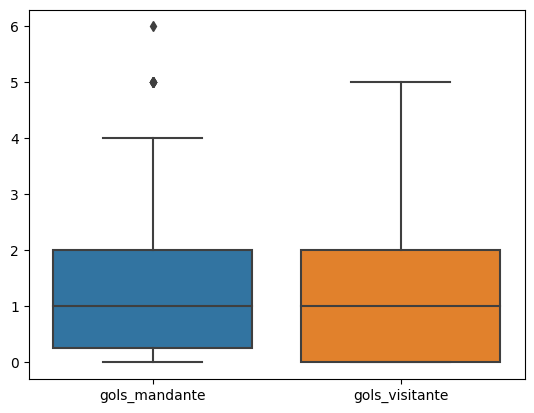

In [45]:
sns.boxplot(est_desc)

<Axes: >

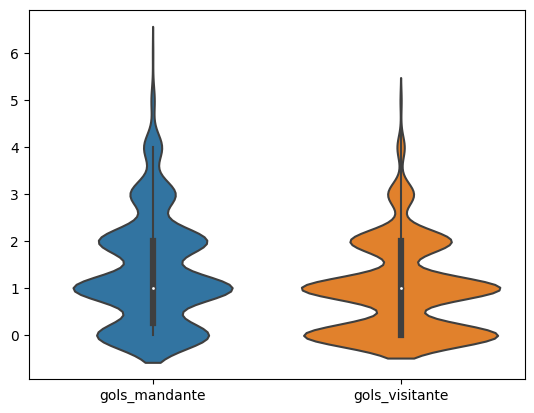

In [46]:
sns.violinplot(est_desc)

Podemos perceber que existe sim, uma pequena diferença entre os times visitantes e os mandantes de campo. Apesar de ser baixa a diferença, a média dos visitantes para os mandantes é um pouco maior, o máximo também é maior. Entretanto, podemos perceber no violinplot que as distribuições parecem similares.

Faremos agora uma análise das vitórias e derrotas em mando de campo.

V    426
E    269
D    243
Name: Resultado, dtype: int64


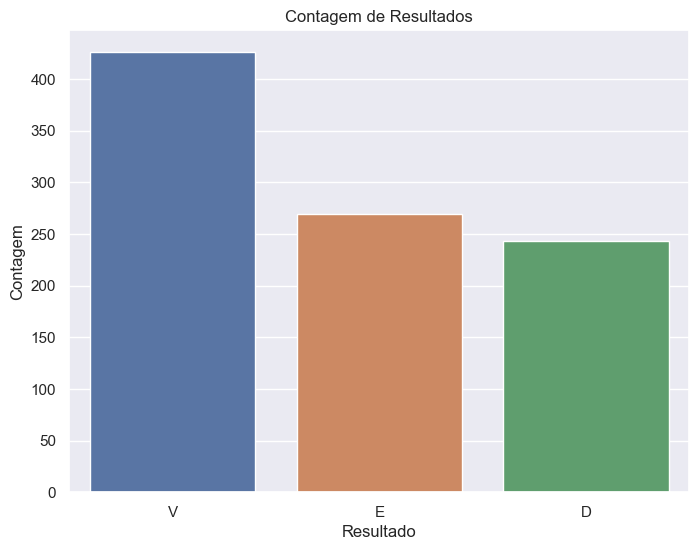

In [64]:
df_filtered['Gols_pro']=df_filtered['gols_mandante']-df_filtered['gols_visitante']
df_filtered['Resultado'] = df_filtered['Gols_pro'].apply(lambda x: 'V' if x > 0 else ('D' if x < 0 else 'E'))
resultado_counts = df_filtered['Resultado'].value_counts()
print(resultado_counts)
sns.set_style("darkgrid", {"grid_color": '.6', "grid_linetype":":"})
plt.figure(figsize=(8, 6))
sns.countplot(data=df_filtered, x='Resultado', order=resultado_counts.index)
plt.xlabel('Resultado')
plt.ylabel('Contagem')
plt.title('Contagem de Resultados')
plt.show()

Podemos então perceber que temos uma vantagem nos times em serem mandantes, com isso, eles conseguem mais vitórias.

# Times que mais conseguem aproveitar do mando de campo.

Nosso objetivo agora é ranquear as vitórias e derrotas dos times que conseguem aproveitar do mando de campo. Entretanto, é injusto que façamos a quantidade de vitórias, visto que times que foram rebaixados, possuem uma quantidade de jogos ao longo de 3 anos menor se comparados a de outros times, entretanto, podemos fazer uma análise com a média de Gols_Pro.

In [93]:
gols_casa = df_filtered.groupby(['time_mandante']).mean()
gols_casa = gols_casa['Gols_pro']
gols_casa = gols_casa.sort_values(ascending=False,)
gols_casa.head()

time_mandante
Flamengo         1.043478
Palmeiras        0.913043
Fluminense         0.8125
Atlético-MG      0.782609
Internacional    0.744681
Name: Gols_pro, dtype: Float64

Pela análise da média, temos que os 5 times com mais médias de gols quando estão a mando de campo são os times acima com seus respectivos resultados.
Os times com piores mando de campo são os times abaixo.

In [94]:
gols_casa.tail()

time_mandante
Juventude       -0.131579
Goiás           -0.178571
Cruzeiro             -0.3
Vasco da Gama   -0.777778
Chapecoense          -1.0
Name: Gols_pro, dtype: Float64

# Times que mais conseguem ter aproveitamento fora de casa

Partindo da mesma ideia acima, podemos fazer uma análise também dos times com mais aproveitamento de gols fora de casa.

In [97]:
df_filtered['gols_contra']= df_filtered['gols_visitante']-df_filtered['gols_mandante']
gols_fora = df_filtered.groupby(['time_visitante']).mean()
gols_fora = gols_fora['gols_contra']
gols_fora = gols_fora.sort_values(ascending=False,)
gols_fora.head()

time_visitante
Cruzeiro          0.875
Palmeiras      0.583333
Flamengo       0.270833
Atlético-MG      0.1875
Botafogo       0.107143
Name: gols_contra, dtype: Float64

In [98]:
gols_fora.tail()

time_visitante
Vasco da Gama        -1.0
Chapecoense     -1.105263
Juventude       -1.131579
Avaí FC         -1.263158
Coritiba FC     -1.571429
Name: gols_contra, dtype: Float64

Podemos perceber que o time com maior aproveitamento fora de casa é o Cruzeiro, que mantém entre os 5 piores aproveitamentos em casa. Além disso, temos outros nomes entre os 5 maiores que estão entre os times que possuíram boa fase nos últimos anos e no período que permaneceu na série A. Um exemplo é o Botafogo que veio com um bom aproveitamento fora de casa, mas que possui dados de 2022 e 2023, visto que no ano de 2021 ele estava na série B, e não aparecia na tabela.

# Referências

[1] Base dos dados: https://basedosdados.org/dataset/c861330e-bca2-474d-9073-bc70744a1b23?table=18835b0d-233e-4857-b454-1fa34a81b4fa - Dados retirados do link acima.